<a href="https://colab.research.google.com/github/asai2094/actualassignment4/blob/main/Ananyashri__Sai_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [ ]:
! git clone https://www.github.com/DS3001/assignment4

Cloning into 'assignment4'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 6
Receiving objects: 100% (8/8), 265.63 KiB | 4.83 MiB/s, done.


**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [ ]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace
from scipy.stats import zscore #from chatgpt
import seaborn as sns # Import Seaborn

<ipython-input-59-e3e2526b2854>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Log_Price'] = np.log(df_new['Price'])


RMSE on Test Set: 226968.278472259
R^2 on Test Set: 0.313204685978997
RMSE on Test Set: 162149.45464491716
R^2 on Test Set: 0.6494677497310719
RMSE on Test Set: 0.0024397358027336453
R^2 on Test Set: 0.9999999999999999
0.9999999999951158
RMSE on Test Set: 0.6052702187012262
R^2 on Test Set: 0.9999999999951158


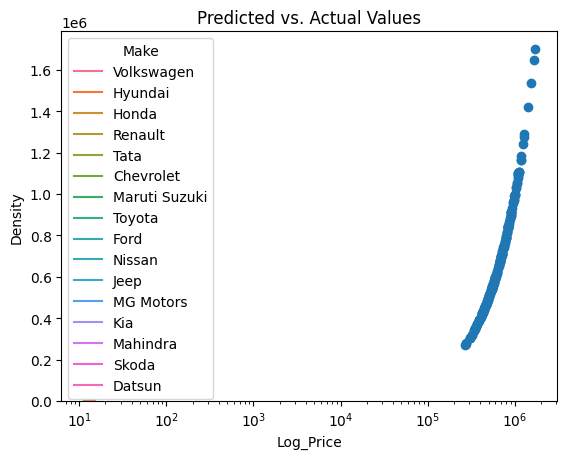

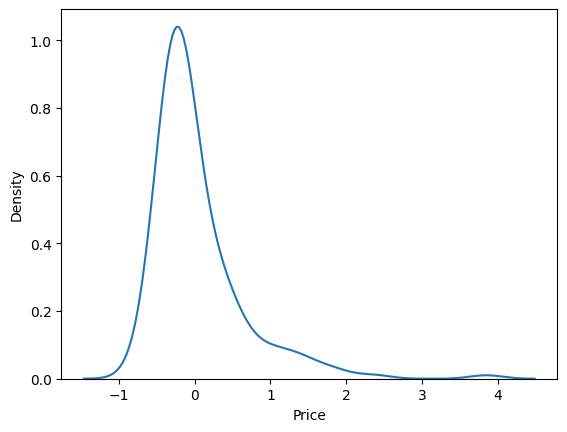

RMSE on Test Set: 4007.2286636629015
R^2 on Test Set: 0.9997859154893574


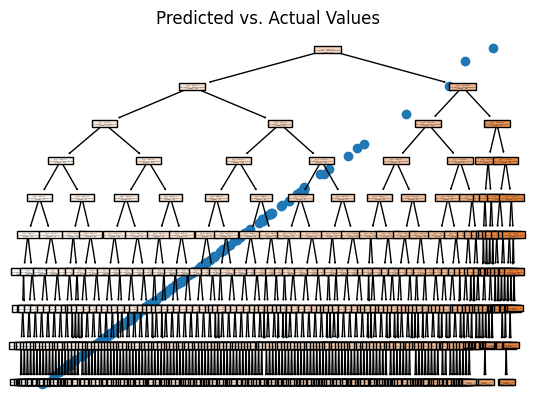

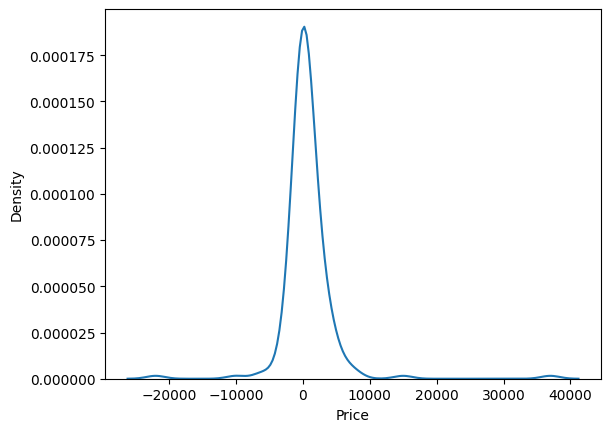

In [ ]:
#Question 1
import matplotlib.pyplot as plt
df = pd.read_csv('./assignment4/data/cars_hw.csv',low_memory=False)
df.head()
df.describe()
nan_values = df.isna().sum()
infinite_values = df.replace([np.inf, -np.inf], np.nan).isna().sum()
infinite_values
nan_values

df_new = df.drop(columns=['Unnamed: 0'])

numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = df[numeric_cols].apply(zscore)
outliers = np.abs(z_scores) > 3
df_new = df[~(outliers).any(axis=1)] #the above 4 lines from chatgpt

df_new['Log_Price'] = np.log(df_new['Price'])
#var = 'Log_Price'
#df[var].hist(bins=30,grid=False)

#Question 2:
df_new['Log_Price'].describe()
#The scaled Price variable has 908 values (as originally it had a severe left-skew). It has a mean of 13.37, a standard deviation of 0.420, a minimum value of 12.144197, and a maximum value of 14.417638.
#The scaled Price variable has a 25th percentile of 13.047640, a 50th percentile of 13.386265, and a 75th percentile of 13.649456.

var = 'Log_Price'
sns.kdeplot(df_new[var]) #Kernel Density Plot

df_new.groupby('Make')['Log_Price'].describe()
sns.kdeplot(data=df_new, x='Log_Price', hue='Make',log_scale=True)
#From this KDE plot, the most expensive car brands are Jeep, MG Motors, and Kia. But generally, it looks like prices have a wide distribution.
#A lot of the brands have peaks that indicates where a lot of their prices are concentrated in. The more variation (i.e., both has a lot of concentration in the different price ranges and variability) is in the more higher up plots like Hyundai or Maruti Suzuki.

#Question 3
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_new, test_size=.2,random_state=100) #splitting into 80-20

#Question 4
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y = df_new['Price']
X = df_new[numeric_cols.drop(['Price'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
reg = LinearRegression().fit(X, y) # Fit the linear model
y_hat_lm = reg.predict(X_test)
R2_lm = r2_score(y_test, y_hat_lm) #from chatgpt
RMSE_lm = mean_squared_error(y_test, y_hat_lm, squared=False) #from chatgpt
print("RMSE on Test Set:", RMSE_lm) #RMSE is 226968.278472259
print("R^2 on Test Set:", R2_lm) #R^2 IS 0.313204685978997

#part 2 categorical variable

y = df_new['Price']
#from chatgpt start
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = df_new.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='drop'  # Drop other features
)

X = preprocessor.fit_transform(df_new)
#^chatgpt ends
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
reg = LinearRegression().fit(X, y) # Fit the linear model
y_hat_lm = reg.predict(X_test)
R2_lm = r2_score(y_test, y_hat_lm) #from chatgpt
RMSE_lm = mean_squared_error(y_test, y_hat_lm, squared=False) #from chatgpt
print("RMSE on Test Set:", RMSE_lm) #RMSE is 162149.45464491716
print("R^2 on Test Set:", R2_lm) #R^2 is 0.6494677497310719
#The categorical model does better on the test set

#part 3 combined
y = df_new['Price']
#chatgpt start
full_preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)
X = full_preprocessor.fit_transform(df_new)
#chatgpt ends
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
reg = LinearRegression().fit(X, y) # Fit the linear model
y_hat_lm = reg.predict(X_test)
R2_lm = r2_score(y_test, y_hat_lm) #from chatgpt
RMSE_lm = mean_squared_error(y_test, y_hat_lm, squared=False) #from chatgpt
print("RMSE on Test Set:", RMSE_lm) #RMSE is 0.0024397358027336453
print("R^2 on Test Set:", R2_lm) #R^2 is 0.9999999999999999
#The combined model performs WAY better! The R^2 value is so close to 1, the closest it can get, telling us it is the best fit for the data. The RMSE is drastically different (from a number in the hundred thousands to like 0.002... that is a significant change) telling us there is such small residuals between predicted and actual values
#Question 5

#part 1 - numerics
y = df_new['Price']
from sklearn.preprocessing import PolynomialFeatures
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
categorical_transformer = OneHotEncoder()

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', expander, numeric_cols),
        ('cat', categorical_transformer, categorical_features)
    ]
)
X = df_new[numeric_cols.tolist() + categorical_features.tolist()] #from chatgpt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train_lm = preprocessor.fit_transform(X_train)#from chatgpt
X_test_lm = preprocessor.transform(X_test)#from chatgpt

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
print(reg.score(X_test_lm, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)
residuals_lm = y_test - y_hat_lm
R2_lm = r2_score(y_test, y_hat_lm) #from chatgpt
RMSE_lm = mean_squared_error(y_test, y_hat_lm, squared=False) #from chatgpt
print("RMSE on Test Set:", RMSE_lm) #RMSE is
print("R^2 on Test Set:", R2_lm) #R^2 is
#As I increase the degree, RMSE and R^2 decreases! R^2 goes negative when the degree is 10. The best model is when it has a degree of 3 (RMSE of 0.6052702187012262 and R^2 of 0.9999999999951158).
#In comparision with the "best model" from part 4, it does have a lower R^2 and a higher RMSE, however, it seems to produce more realistic results when the best model from part 4 could just be too good to be true (in this case, it could maybe be overfitting our data)

#Question 6: deciding to go with model in question 5

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show() # The values roughly line up against the diagnol!

#Residual plot:
sns.kdeplot(residuals_lm)
plt.show() #The residuals do roughly look like a bell shaped curve around 0, with a right-skewed tail

#Evaluating strengths and weaknesses of the model:
#The strengths of this model is as follows: a very high R^2 value (close to 1, indicating that our model is able to account for almost all of its variable data, and is a pretty good fit),
#a low RMSE value (along with the graph of predicted vs actual) conveys that our model's predictions are pretty close to the actual values, and the residual's distribution around 0 conveys that our model has a pretty normal distribution (and errors are also distributed normally as well).
#The weaknesses for this model is as follows: the right skewed tail for the residuals showcase that there are some outliers we haven't really accounted for (maybe error in choosing to pursue Price instead of Log_Price),
#and the near perfect R^2 may suggest that our model might be overfitting its data and might affect its ability down the road with new data.

#Question 7
from sklearn import tree
y = df_new['Price']
#chatgpt start
full_preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)
X = full_preprocessor.fit_transform(df_new)
#chatgpt ends
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
model = tree.DecisionTreeRegressor(max_depth=9)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_lm = y_test - y_hat_cart
R2_lm = r2_score(y_test, y_hat_cart) #from chatgpt
RMSE_lm = mean_squared_error(y_test, y_hat_cart, squared=False)
print("RMSE on Test Set:", RMSE_lm) #RMSE is
print("R^2 on Test Set:", R2_lm) #R^2 is
#Varying R^2 and RMSE's for different depths: depth of 5 (R^2 = 0.9980722838001086, RMSE =12024.666783851475), depth of 4 (R^2 = 0.9916945216714953, RMSE = 24959.381925321308)
#depth of 7 (R^2 = 0.9997168491465764, RMSE = 4608.508994018916), depth of 9 (R^2 = 0.9999001226034395, RMSE = 2737.064983750792), and depth of 10 (R^2 = 0.9998179671044641 , RMSE = 3695.102079827008)
#I would say the best tree is of depth 9 - lowest R^2 and lowest RMSE while still being reasonable

#Question 8
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show() #Yes, it roughly looks like a diagonal line!
#Residual plot:
sns.kdeplot(residuals_lm)
plt.show() #Yes, it looks like there is a normal distrbution around 0

#Question 9: The tree regression model looks like it could be better (given its pretty close to 1 R^2 values and low RMSE value and more normal residual's plot)


**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

method    1   2    3
row_0               
1       121   1    0
2         0  73    0
3         0   0  100
Overall Accuracy: 0.9966101694915255
row_0
1    0.991803
2    1.000000
3    1.000000
dtype: float64


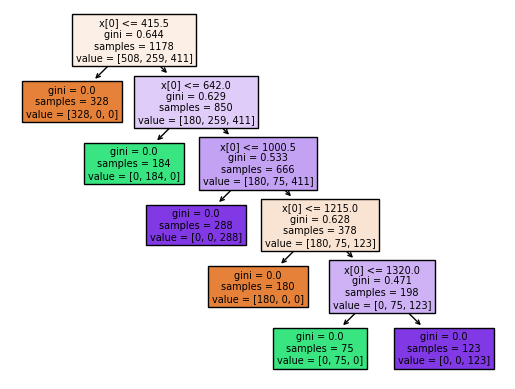

In [ ]:
#Question 1
df = pd.read_csv('./assignment4/data/contraception_hw.csv',low_memory=False)
df.head()
df.describe()
df_new = df.drop(columns=['Unnamed: 0'])
df_new.head()
df_new.describe()

df_new['method'].value_counts()
pd.crosstab(df_new['method'], df_new['numberChildren'])
#Couples that utilize birth control (denoted by the number 3 in method), tend to not have as much children in comparision to those who use no contraceptive methods. However, they tend to have more children overall in comparision with those who utilize Long term methods (i.e., like an IUD or sterlization).

#Question 2
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_new, test_size=.2,random_state=100) #splitting into 80-20

#Question 3
from sklearn import tree
y = df_new['method']
X = df.drop('method', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
model = tree.DecisionTreeRegressor(max_depth=5)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
#Looking at the resulting tree, the terminal nodes are taking up decimal values. This doesn't make sense in the context of the problem as it seems like the tree is calculating continuous numerical values for each of the terminal nodes.
#The decimal values just don't make sense because our target variable is "method" - a variable that we tabulated and associated meaning behind the numbers 1,2, and 3 (they literally don't have a numerical meaning behind them).
#In addition, it looks like for each leaf of the tree, there are attempts to calculate the mean or squared error or some other mathematical computation. But when we have a majority of categorical data (with a lot of dummy variables too), the numbers when computed this way lose their meaning.
#Therefore, it looks like we utilized the wrong type of tree as our predicted values just don't make sense.

#Question 4
y = df_new['method']
X = df.drop('method', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

model = tree.DecisionTreeClassifier(max_depth=5) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
#This new tree looks pretty different from the old one. I find it pretty interesting that the terminal nodes now showcase a list of values - more like a count of how many times specific instances apply.
#Other than utilizing the method variable (an index for the terminal nodes' value list that indicates which category of contraception method used by individuals), they are also utilizing the gini variable and probably other columns/variables as they apply or hold more influence.
#Generally speaking, I think that the more kids someone has, the less likely they are going to utilize long term contraception or no contraception. But I think that this might change due to other factors (i.e., education level).

#Question 5
y_hat_cart = cart.predict(X_test)
tab = pd.crosstab(y_hat_cart,y_test)
print(tab)

overall_acc = (y_test == y_hat_cart).mean() #from chatgpt
print(f"Overall Accuracy: {overall_acc}") # 0.9966101694915255

acc_each = np.diag(tab) / np.sum(tab, axis=1) #from chatgpt
print(acc_each)#1    0.991803, 2    1.000000, 3    1.000000

#Question 6
#We can't really use a linear probability model in this exercise because it is not well suited to handle this categorical data.
#Usually, linear probabily models work with more binary data - but in our case, we are utilizing variables like method where we have 3 categories (1 whole category more than the others).
#In addition, taking a linear, or more one-to-one, approach between the predictors and the probability for hte categories won't work here because the nature of our data just has the possibilities of so many variables influencing a set outcome (like what we saw previously, education level, occupation, and among other collected factors could play a large role).
#And adding on to that, since we may have a lot of factors influencing our probability, there is a large chance that linear probability models may output a result thats outside of the nominal 0 to 1 range, making it even harder to interpret would that means in the context of the observed variables.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?